
# Quaternion SLERP

For small rotations, linear interpolation of quaternions gives almost the same
results as spherical linear interpolation (SLERP). For larger angles there are
significant differences as you can see in this example. The outer circle uses
linear interpolation and the inner circle uses SLERP. You can play around with
the value of 'end_angle' in this example.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.rotations import (
    matrix_from_axis_angle, quaternion_from_matrix, quaternion_slerp)
from pytransform3d.trajectories import plot_trajectory

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


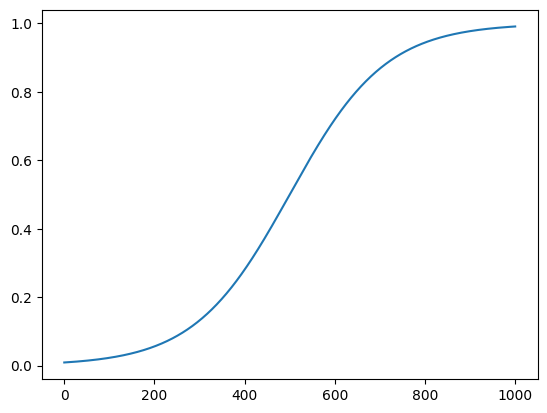

In [2]:
T = np.linspace(0, 1, 1001)
sigmoid = 0.5 * (np.tanh(1.5 * np.pi * (T - 0.5)) + 1.0)
radius = 0.5
start_angle = np.deg2rad(45)
end_angle = np.deg2rad(270)
print(T)
plt.plot(sigmoid)

In [3]:
R1 = matrix_from_axis_angle([0, 0, 1, 0.5 * np.pi])
R2_start = matrix_from_axis_angle([1, 0, 0, start_angle])
R2_end = matrix_from_axis_angle([1, 0, 0, end_angle])
q_start = quaternion_from_matrix(R1.dot(R2_start))
q_end = quaternion_from_matrix(R1.dot(R2_end))
print('R1:\n', np.around(R1, decimals=2))
print('R2_start:\n', np.around(R2_start,decimals=2))
print('R2_end:\n', np.around(R2_end,decimals=2))
print('q_start:\n', np.around(q_start,decimals=2))
print('q_end:\n', np.around(q_end,decimals=2))

R1:
 [[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
R2_start:
 [[ 1.    0.    0.  ]
 [ 0.    0.71 -0.71]
 [ 0.    0.71  0.71]]
R2_end:
 [[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0. -1.  0.]]
q_start:
 [0.65 0.27 0.27 0.65]
q_end:
 [ 0.5 -0.5 -0.5  0.5]


In [4]:
Y = np.zeros((len(T), 7))
Y[:, 0] = radius * np.cos(start_angle + (end_angle-start_angle) * sigmoid)  # radius*cos(pi/2-end_angle*x)
Y[:, 2] = radius * np.sin(start_angle + (end_angle-start_angle)  * sigmoid)  # radius*sin(pi/2-end_angle*x)
if end_angle > np.pi:
    q_end *= -1.0
Y[:, 3:] = (1.0 - T)[:, np.newaxis] * q_start + T[:, np.newaxis] * q_end  # (1.0-T)*q_start+T*q_end
print(Y.shape)
# plt.plot(Y[:,0])
# plt.plot(Y[:,2])
# plt.legend(['Y[:,0]', 'Y[:,2]'])
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# X1, Y1 = np.meshgrid(Y[:,0], Y[:,1])
# Z1 = np.zeros_like(X1)
# Z1[:] = Y[:,2]
# Z2 = np.exp(-X1**2,Y**2)
# # ax.plot_surface(X1, Y1, Z1)
# ax.plot_surface(X1, Y1, Z2)

(1001, 7)


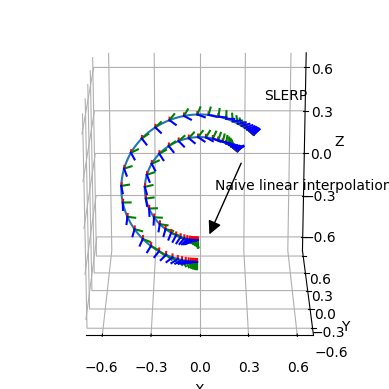

In [5]:
Y_slerp = np.zeros((len(T), 7))
Y_slerp[:, 0] = 0.7 * radius * np.cos(start_angle + (end_angle-start_angle)  * sigmoid)  # 0.7radius*cos(pi/2-end_angle*sigmoid)
Y_slerp[:, 2] = 0.7 * radius * np.sin(start_angle + (end_angle-start_angle)  * sigmoid)  # 0.7radius*sin(pi/2-end_angle*sigmoid)
for i, t in enumerate(T):
    Y_slerp[i, 3:] = quaternion_slerp(q_start, q_end, t)  # quaternion_slerp:球面线性插值

ax = plot_trajectory(
    P=Y[:, :7], show_direction=True, n_frames=40, s=0.05, ax_s=0.7)
ax1 = plot_trajectory(
    P=Y_slerp[:, :7], show_direction=False, n_frames=40, s=0.05, ax=ax)
ax.text(0.1, 0, 0, "Naive linear interpolation")
ax1.text(0.4, 0, 0.6, "SLERP")
ax.view_init(elev=20, azim=-90)
plt.show()